# Group taxi data by zone and use geopandas to see locations based trends.

In [2]:
import pandas as pd
import numpy as np
import math
import os
import glob
import random
import datetime
import shapefile
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import mapclassify

In [3]:
#Import previously created files and reassigne datatypes
#define data types for import
nyt_dtypes = {'VendorID':float,'passenger_count':float,'trip_distance':float,'PULocationID':int,'DOLocationID':int,'fare_amount':float,\
          'extra':float,'mta_tax':float,'tip_amount':float,'tolls_amount':float,'improvement_surcharge':float,'total_amount':float,\
          'congestion_surcharge':float,'year':int,'month':int,'day':int,'hour':int,'date':object,'PUBorough':object,'PUZone':object,\
          'PUservice_zone':object,'DOBorough':object,'DOZone':object,'DOservice_zone':object,'RateName':object,'PaymentName':object,\
          'covid':bool,'from:to':object,'tax_amount':float}

nyt_processed = r'C:\Users\stevedc\Documents\DataMining\Output Files\nytAll_1pcnt.csv'
df_nyt = pd.read_csv(nyt_processed, delimiter=',', dtype=nyt_dtypes)

#convert dates back to date format
df_nyt['tpep_pickup_datetime'] = pd.to_datetime(df_nyt['tpep_pickup_datetime'])
df_nyt['tpep_dropoff_datetime'] = pd.to_datetime(df_nyt['tpep_dropoff_datetime'])
df_nyt['date'] = pd.to_datetime(df_nyt['date'])


# Break down data to Pre and Post Covid and group by Zone

In [7]:
df_nytAll_byZone_PreCov = df_nyt[(df_nyt['covid']==False)]
df_preCov_route = df_nytAll_byZone_PreCov.groupby('from:to').agg({'passenger_count':'mean','trip_distance':'mean','congestion_surcharge':'sum','fare_amount':'sum','total_amount':'sum','tip_amount':'sum','PULocationID':'count'}).rename(columns={'passenger_count':'AvgPassengerCount','trip_distance':'AvgDistance','congestion_surcharge':'TotalCongestionSurcharge','total_amount':'TotalCost','PULocationID':'TripCount'})
df_preCov_route = df_preCov_route.sort_values(by='TripCount', axis=0, ascending=False)

nyt_PreCov_RideCount = df_nytAll_byZone_PreCov['PULocationID'].count()
df_nytAll_byZone_PreCov = df_nytAll_byZone_PreCov.groupby('PUZone').agg({'passenger_count':'mean','trip_distance':'mean','congestion_surcharge':'sum','fare_amount':'sum','total_amount':'sum','tip_amount':'sum','PULocationID':'count'}).rename(columns={'passenger_count':'AvgPassengerCount','trip_distance':'AvgDistance','congestion_surcharge':'TotalCongestionSurcharge','total_amount':'TotalCost','PULocationID':'TripCount'})
df_nytAll_byZone_PreCov['%ofTotalRides'] = (df_nytAll_byZone_PreCov['TripCount'] / nyt_PreCov_RideCount) * 100
df_nytAll_byZone_PreCov['%Tip'] = (df_nytAll_byZone_PreCov['tip_amount'] / df_nytAll_byZone_PreCov['fare_amount']) * 100
df_nytAll_byZone_PreCov = df_nytAll_byZone_PreCov.sort_values(by='PUZone', axis=0, ascending=True)
display(df_nytAll_byZone_PreCov)


df_nytAll_byZone_PostCov = df_nyt[(df_nyt['covid']==True)]
df_postCov_route = df_nytAll_byZone_PostCov.groupby('from:to').agg({'passenger_count':'mean','trip_distance':'mean','congestion_surcharge':'sum','fare_amount':'sum','total_amount':'sum','tip_amount':'sum','PULocationID':'count'}).rename(columns={'passenger_count':'AvgPassengerCount','trip_distance':'AvgDistance','congestion_surcharge':'TotalCongestionSurcharge','total_amount':'TotalCost','PULocationID':'TripCount'})
df_postCov_route = df_postCov_route.sort_values(by='TripCount', axis=0, ascending=False)

nyt_PostCov_RideCount = df_nytAll_byZone_PostCov['PULocationID'].count()
df_nytAll_byZone_PostCov = df_nytAll_byZone_PostCov.groupby('PUZone').agg({'passenger_count':'mean','trip_distance':'mean','congestion_surcharge':'sum','fare_amount':'sum','total_amount':'sum','tip_amount':'sum','PULocationID':'count'}).rename(columns={'passenger_count':'AvgPassengerCount','trip_distance':'AvgDistance','congestion_surcharge':'TotalCongestionSurcharge','total_amount':'TotalCost','PULocationID':'TripCount'})
df_nytAll_byZone_PostCov['%ofTotalRides'] = (df_nytAll_byZone_PostCov['TripCount'] / nyt_PostCov_RideCount) * 100
df_nytAll_byZone_PostCov['%Tip'] = (df_nytAll_byZone_PostCov['tip_amount'] / df_nytAll_byZone_PostCov['fare_amount']) * 100
df_nytAll_byZone_PostCov = df_nytAll_byZone_PostCov.sort_values(by='PUZone', axis=0, ascending=True)
display(df_nytAll_byZone_PostCov)
df_nytAll_byZone_PostCov['%Change'] = (df_nytAll_byZone_PostCov['%ofTotalRides'] - df_nytAll_byZone_PreCov['%ofTotalRides']) / df_nytAll_byZone_PreCov['%ofTotalRides']
df_nytAll_byZone_PostCov = df_nytAll_byZone_PostCov.sort_values(by='%Change', axis=0, ascending=False)


#DataFrame.sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)


#print(nyt_PreCov_RideCount)
#print(nyt_PostCov_RideCount)
#display(df_nytAll_byZone_PostCov)
#display(df_preCov_route)
#display(df_postCov_route)

,AvgPassengerCount,AvgDistance,TotalCongestionSurcharge,fare_amount,TotalCost,tip_amount,TripCount,%ofTotalRides,%Tip
PUZone,,,,,,,,,
Allerton/Pelham Gardens,1.578947,5.359474,0.00,474.55,543.45,8.46,19,0.001934,1.782742
Alphabet City,1.597079,2.584900,3622.50,19497.69,28274.89,3051.98,1643,0.167257,15.653034
Arden Heights,1.000000,17.200000,2.50,438.32,464.04,15.62,7,0.000713,3.563606
Arrochar/Fort Wadsworth,1.000000,7.160000,0.00,231.00,315.52,31.42,7,0.000713,13.601732
Astoria,1.488994,2.793687,617.50,15497.36,19096.70,1290.38,1272,0.129489,8.326450
...,...,...,...,...,...,...,...,...,...
Woodlawn/Wakefield,1.352941,8.462353,0.00,611.58,670.36,5.00,17,0.001731,0.817555
Woodside,1.593688,3.294122,330.00,8603.95,10721.11,843.24,507,0.051612,9.800615
World Trade Center,1.640677,4.098982,12972.50,95506.96,131964.25,15110.16,5669,0.577103,15.821004


,AvgPassengerCount,AvgDistance,TotalCongestionSurcharge,fare_amount,TotalCost,tip_amount,TripCount,%ofTotalRides,%Tip
PUZone,,,,,,,,,
Allerton/Pelham Gardens,1.000000,4.773333,0.0,108.7,131.08,7.41,3,0.019175,6.816927
Alphabet City,1.095238,2.277619,52.5,209.4,310.83,26.18,21,0.134228,12.502388
Astoria,1.205882,2.307353,20.0,332.5,427.25,33.93,34,0.217322,10.204511
Auburndale,1.000000,0.000000,0.0,17.2,18.00,0.00,1,0.006392,0.000000
Bath Beach,1.000000,21.670000,0.0,59.5,63.55,2.75,1,0.006392,4.621849
...,...,...,...,...,...,...,...,...,...
Woodlawn/Wakefield,2.250000,1.780000,0.0,50.2,58.66,3.76,4,0.025567,7.490040
Woodside,1.909091,2.828182,12.5,126.0,168.40,14.60,11,0.070310,11.587302
World Trade Center,1.416667,4.195000,90.0,533.0,763.68,100.38,36,0.230105,18.833021


#  Geopandas, uses pre adn post covid grouped data including variance

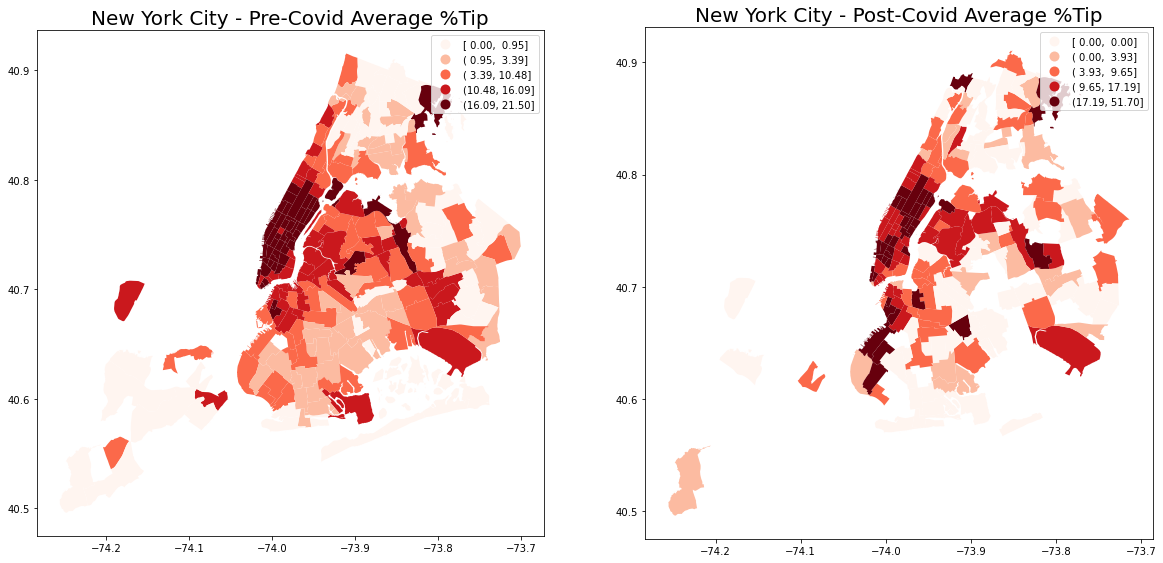

In [8]:
shapefiles = r'C:\Users\stevedc\Documents\DataMining\NYC Taxi Zones\geo_export_86981a9d-2758-43d9-96d5-323ae1fa569c.shp'
zone_shapes = gpd.read_file(shapefiles)
zone_shapes_postCov = pd.merge(zone_shapes, df_nytAll_byZone_PostCov, left_on=['zone'], right_on=['PUZone'])
zone_shapes_preCov = pd.merge(zone_shapes, df_nytAll_byZone_PreCov, left_on=['zone'], right_on=['PUZone'])

#print(zone_shapes)

fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
zone_shapes_preCov.plot(ax=axes[0], cmap = 'Reds', column='%Tip', legend=True, scheme='quantiles')
zone_shapes_postCov.plot(ax=axes[1], cmap = 'Reds', column='%Tip', legend=True, scheme='quantiles')
#plt.legend(loc=2, fontsize=10)
axes[0].set_title('New York City - Pre-Covid Average %Tip', fontsize=20)
axes[1].set_title('New York City - Post-Covid Average %Tip', fontsize=20)
plt.show()


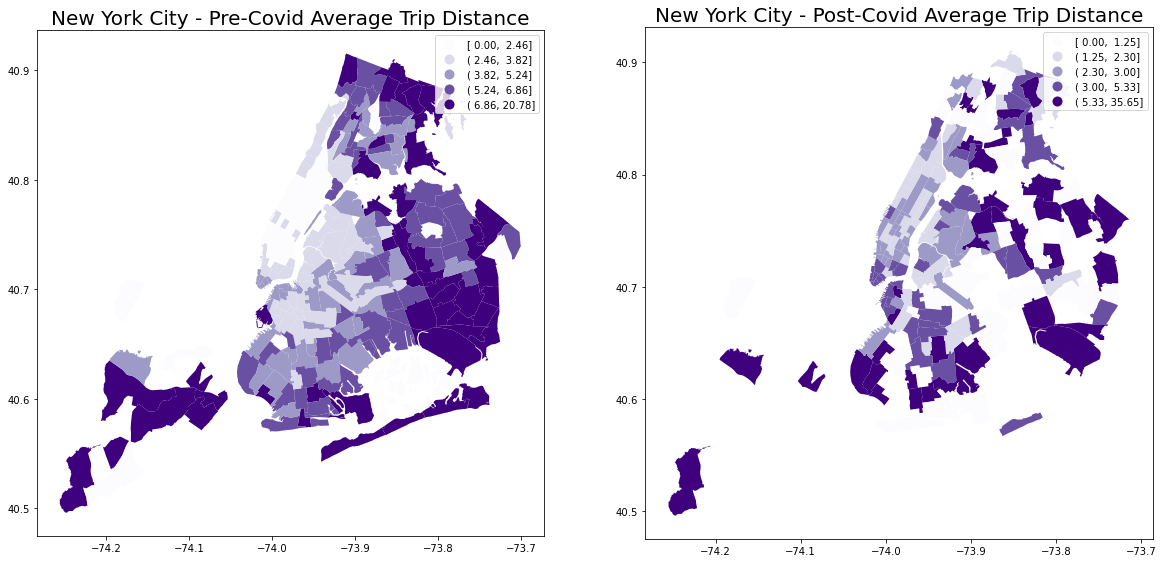

In [9]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
zone_shapes_preCov.plot(ax=axes[0], cmap = 'Purples', column='AvgDistance', legend=True, scheme='quantiles')
zone_shapes_postCov.plot(ax=axes[1], cmap = 'Purples', column='AvgDistance', legend=True, scheme='quantiles')
#plt.legend(loc=2, fontsize=10)
axes[0].set_title('New York City - Pre-Covid Average Trip Distance', fontsize=20)
axes[1].set_title('New York City - Post-Covid Average Trip Distance', fontsize=20)
plt.show()

C:\Users\stevedc\anaconda3\lib\site-packages\mapclassify\classifiers.py:235: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
C:\Users\stevedc\anaconda3\lib\site-packages\mapclassify\classifiers.py:238: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


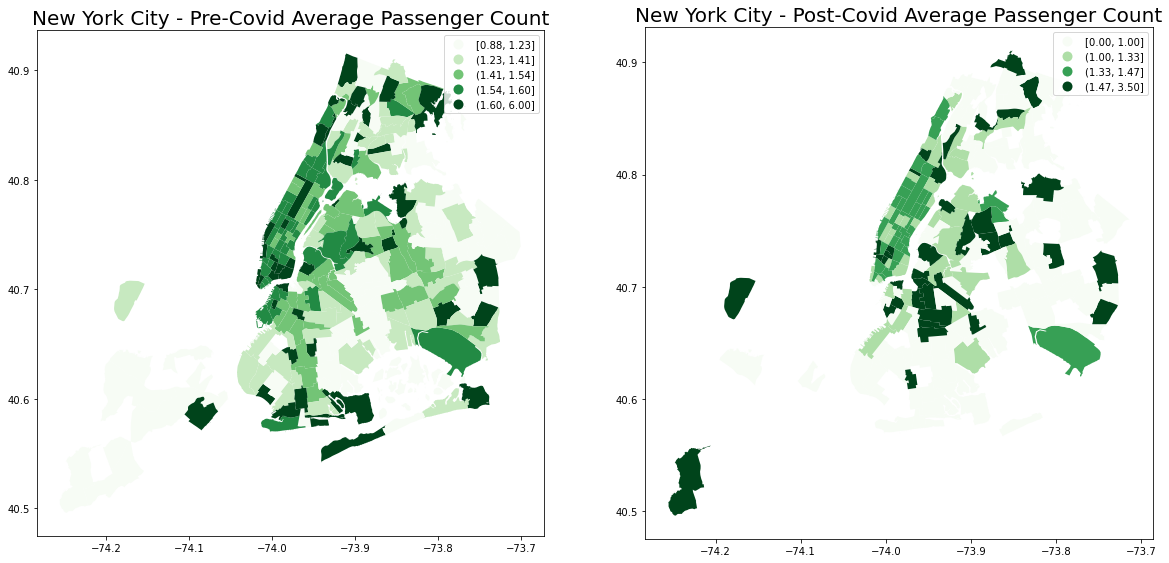

In [10]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
zone_shapes_preCov.plot(ax=axes[0], cmap = 'Greens', column='AvgPassengerCount', legend=True, scheme='quantiles')
zone_shapes_postCov.plot(ax=axes[1], cmap = 'Greens', column='AvgPassengerCount', legend=True, scheme='quantiles')
#plt.legend(loc=2, fontsize=10)
axes[0].set_title('New York City - Pre-Covid Average Passenger Count', fontsize=20)
axes[1].set_title('New York City - Post-Covid Average Passenger Count', fontsize=20)
plt.show()

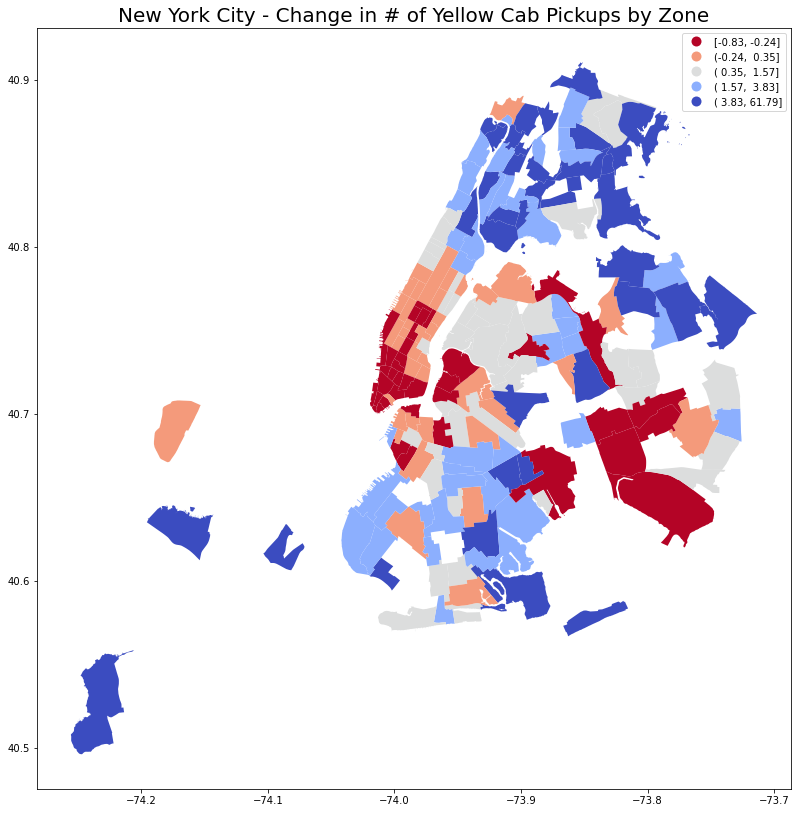

In [12]:
zone_shapes_postCov.plot(cmap = 'coolwarm_r', column='%Change', figsize = (14,14), legend=True, scheme='quantiles')
#plt.legend(loc=2, fontsize=10)
plt.title('New York City - Change in # of Yellow Cab Pickups by Zone', fontsize=20)
plt.show()